### Econ 176 APIs Day 2 - and ***first computing assignment***

We're back! [Here was Day 1](https://colab.research.google.com/drive/1laKhKCXTFtCAGKrOqQfisbGPyQE-xexm#scrollTo=nCAN5xmzEP9t&uniqifier=1)

<font size="-1">Today, we'll continue building familiarity with APIs through calling and analyzing the results (using Python, of course!)

#### Where were we?

We had tried the International Space Station API at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json) :

In [ ]:
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
print(result)

# if it succeeds, you should see <Response [200]>

# Personal changes
print("status_code",result.status_code)
print("json response", result.json())
print("reponse as string", result.text)

# python_url = "https://google.com/search"
# params = {"q": "python", "sort": "popular"}
# response = requests.get(python_url, params=params)
# print(response.text)
#




<Response [200]>
status_code 200
json response {'timestamp': 1739571347, 'iss_position': {'latitude': '-30.7503', 'longitude': '45.3194'}, 'message': 'success'}
reponse as string {"timestamp": 1739571347, "iss_position": {"latitude": "-30.7503", "longitude": "45.3194"}, "message": "success"}


In [ ]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... remember that a json object is a Python dictionary:

json_contents is {'timestamp': 1739570889, 'iss_position': {'latitude': '-47.5667', 'longitude': '15.3278'}, 'message': 'success'}


In [ ]:
#
# Let's remind ourselves how dictionaries work:

# iss latitude
iss_lat = json_contents['iss_position']['latitude']
iss_lat = float(iss_lat)
print("lat: ", iss_lat)

# iss longitude
iss_long = json_contents['iss_position']['longitude']
iss_long = float(iss_long)
print("long: ", iss_long)




lat:  -47.5667
long:  15.3278


Here is a function that returns the distance detween two (lat/long) pairs:


<font size="-2">

```   
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import *
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))
```
</font>

#### <font color="Coral"><b>Task 0</b></font> &nbsp;&nbsp; Let's, together, create a program that finds the distance from the ISS to Claremont
+ It can just be a cell, it doesn't have to be its own function.
+ But, let's definitely use the haversine function, above...





In [ ]:
#
from math import *
# Let's make sure we "unpack the process" w/o AI
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))

# Claremont Coordinates
claremont_long = 34.0967
claremont_lat = -117.7198

# ISS coordinates from above kernel
iss_long
iss_lat

distance = haversine(claremont_lat, claremont_long, iss_lat, iss_long)
print("Distance between Claremont and ISS", distance)



Distance between Claremont and ISS 4773.314694321615


In [ ]:
#
# Then, let's compare with AI's result...
#

Vice-versa is ok, too...

<br>
<hr>
<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)

In [ ]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [ ]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
d = astronauts   # a shorter variable for convenience..


# Remember:  astronauts will be a _dictionary_
note = """ here's yesterday evening's result - it _should_ be the same this morning!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "[REDACTED] Guangsu"},
{"craft": "Tiangong", "name": "[REDACTED] Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
print(d)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [ ]:
d['people']

[{'craft': 'ISS', 'name': 'Oleg Kononenko'},
 {'craft': 'ISS', 'name': 'Nikolai Chub'},
 {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
 {'craft': 'ISS', 'name': 'Matthew Dominick'},
 {'craft': 'ISS', 'name': 'Michael Barratt'},
 {'craft': 'ISS', 'name': 'Jeanette Epps'},
 {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
 {'craft': 'ISS', 'name': 'Butch Wilmore'},
 {'craft': 'ISS', 'name': 'Sunita Williams'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'},
 {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]

This is pretty intricate!

Let's try unpacking this - _parsing it_ - with an in-class, break-out challenge...

#### <font color="Coral"><b>Task 1</b></font>: &nbsp;&nbsp; In-class break-out ...

<br>
<hr>
<br>

### Ok!  

#### You should add to your resume that
+ you have experience with traditional _web-scraping_
+ and with making - and interpreting - _API calls_
+ whether they convey plain-text or json-structured data...

<br>

Let's go deeper, to
+ see how the API "endpoints" themselves are implemented
+ see how parameters can be used in calling API endpoints
  + at least, with GET requests
  + POST requests are also common - that's for another day


### _Behind the Curtain_ of an API:

Let's watch _inside_ API calls, using CodeSandbox...

Specifically, let's practice using <u>parameters</u> to an API call:


### GET parameters

The GET request includes all of the information needed in the URL itself!

Here are a couple of images showing the _pieces_ of urls:

<img src="https://static.semrush.com/blog/uploads/media/ca/37/ca3737d8edb5cf079aaf1f11ae01d286/mMREmiwXSrryVyv8IxbVFgje7ICFhfqWnca7W0db36KjX35vzLTnStkFynEd9NBoXXH-JYKCm2deskxgLo_vxzEvl-qLpVOgtwc78rhFI2Rm1pBK-j2SwMKWz0CXU42STjzUVcF1vaRTFbw_6wvH_5A.webp">

#### Using query-string parameters

**Challenge!**

Team up with people nearby and make API calls to the endpoints

+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery0"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery1"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery2"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery3"`

_each_ of which uses query-string parameters
+ `x` (an integer) and
+ `y` (an integer)

and see if you can determine what each one is doing... and how the parameters are being used?!

<br>



In [ ]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery0?x=1&y=3"    # perhaps try from browser first!
result_ft = requests.get(url)
print(result_ft)              # prints the status_code

d = result_ft.json()            # here are the _contents_
d

<Response [503]>


JSONDecodeError: Expecting value: line 2 column 1 (char 1)

We can create larger custom API calls, as well...

For example,

In [ ]:
#
# A larger API call to the same CodeSandbox server

import requests

url = "https://fvcjsw-5000.csb.app/fintech"    # try this from your browser first!
result_ft = requests.get(url)
result_ft

<Response [503]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result_ft.json()                  # try .text, as well...
print(f"The resulting data is {d}")

JSONDecodeError: Expecting value: line 2 column 1 (char 1)

**Challenge**:   extract your initials from `d`   &nbsp;&nbsp; 😀


<b><font color="DodgerBlue">Hint</font></b>: &nbsp;&nbsp; Start with &nbsp;&nbsp;  ``d[ <something> ]``   &nbsp;&nbsp;   What's the ``something``?

<i>Only do one step at a time...</i>  &nbsp;&nbsp; This is key!

In [ ]:
#
# see if you can extract only your initials from d
d

# we're not finished yet! :)

alphavantage API key: PSPGHH60JUGEPT7F

<br>
<hr>
<br>

### Another API, now _finance-inspired_ ...

There are **lots** of finance APIs. I'm currently skeptical that they're materially different, though I'm happy to be convinced... .

One material difference is price! The kind folks at _Alphavantage_ have offered us an Econ176-specific set of API keys. Let's dive in!

Before using your key, try a demonostration call at this endpoint:

`https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo`

which, as ever, is this link:

[https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo](https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo)

You'll see that it's the last 100 days of information from IBM. To obtain other symbols' data - or other data - you'll need to use your API key. Notice that the demo url, above, has `demo` as the `apikey` (it only works for IBM 😀)

You should have your own API key, from class on 2/6:
+ if you use that string of characters in place of ``demo`` above, you should be able to make calls to _any_ of the Alphavantage APIs
+ it has "medium" bandwidth - for us, we are making single calls and then analyzing them, which will not stress any limits <br> <font size="-2">(Do avoid fast loops: if too much bandwidth is used, they APIs will automatically disable the key.)</font>
+ _Experiment!_

### Getting comfortable with documentation...

APIs come with widely varying documentation
+ sometimes you're guessing (as we did above!)
+ more often, they're documented... **but** the documentation tends to have lots of idiosynrasies (there's not as much standardization as one might hope on how these things are discussed, the computing languages presumed, etc.)

So, it's a worthy task - and challenge - to get familiar with the many kinds and conventions of documentation out there.

Take a look at the [Alphvantage documentation](https://www.alphavantage.co/documentation/):
+ specifically, find the section for the `TIME_SERIES_DAILY` function
+ read over the parameters
+ click on some of the examples
+ see if you can reconcile the outputs you're seeing with the parameters provided

Next, we'll try it out...

... and will determine the best "single-share" strategy for investing -- for your choice of stock -- over the past 100 days. <br> <font size="-2">(You might remember this as a cs5 homework, the ["TT Securities" problem](https://www.cs.hmc.edu/twiki/bin/view/CS5Fall2023/TTSecuritiesGold).)</font>

<br>
<hr>
<br>

### Your tasks!

**<font color="Coral">Part 1</font>: &nbsp;&nbsp; <font color="DodgerBlue">Single-share Analysis</font>** &nbsp; using TIME_SERIES_DAILY

So, your tasks include
+ get your API working - the first cell below will help
+ make sure you're getting data! - the second cell below will help with that!
+ choose another stock symbol
  + for now, let's stick with the compact data of the last 100 days
  + also, be sure to make _one_ call and then code-develop with that data
  + it will quickly annoy API providers if you make too many calls
  + there are automatic "shutoffs" to stop responding in this case...
  + it's not clear when the "shutoff" stops - possibly never

<br>

So, after making one call, explore the resulting data (dictionary) so that you
+ programmatically extract the 100 prices (let's use the **closing** price)
+ create a list with them
+ find the maximum and the minimum
  + also find the _date_ of the max and the _date_ of the min
  + be sure to print those out...
+ create a **graph** of your list &nbsp; (suggestion: use AI for graphing help)
  + get the AI to highlight the max and the min
+ "Single-share" analysis: &nbsp; Find the buy day and sell day that maximize `(sell price - buy price)`
  + make sure that you sell _at or after_ you buy...
+ print your results
+ re-graph your 100-day signal, and highlight the buy day and the sell day you just found
  + you might ask to use ``seaborn`` or ``matplotlib`` - both are libraries available in Colab (and libraries that the AI knows well)

<br>

Once you have a workflow that works, try it with a different stock symbol!
+ do the same thing for the other signal: print the best single-share strategy - and graph
+ compare the results in your overall reflection below
+ you could wrap the workflow pieces into a function that takes a stock symbol as input! (This is optional and cs-y.)

<br>

**<font color="Coral">Part 2</font>: &nbsp;&nbsp; <font color="DodgerBlue">Use and Analyze <u>another</u> Alphavantage API</font>** &nbsp; ... of your choice
+ Look over the left-hand column of APIs in the [Alphavantage documentation](https://www.alphavantage.co/documentation/)
+ Choose another API that seems interesting to you, then
+ Explore and tinker to successfully use it, then
+ Analyze a subset of the data from the resulting call, then
+ Share, briefly, what you found.
  + The analysis does not need to be involved. For example,
  + finding the max and min of a value is wonderful - and definitely enough
  + or, the average, or sum, or ... really anything,
  + as long as it means you've looked through each time step of the data-sequence received  <font size="-1">(not each piece of data, just each time step)</font>
+ <font color="Coral"><b>EC</b></font> Totally optional: <font size="-1">Find a function for comparing time-series trends, import it, and then use it to compare one of your stock prices with your _other_ Alphavantage signal. Report what you find! (up to +10%) &nbsp;&nbsp; Initial library leads: ``statsmodels``, ``darts``, and/or ``sktime`` ...</font>

<br>

Some of the other APIs that look especially interesting, at least to me:
+ News & Sentiments
+ Income Statement / Balance Sheet
+ GDP per capita
+ Exchange rates
+ Coffee!



<br>
<hr>
<br>

### Onward!

In [ ]:
#
# Let's request!   Just using the demo, for now:

import requests

# choose Apple Stock (AAPL)
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=PSPGHH60JUGEPT7F"    # demo version
result = requests.get(url)
print(result)

<Response [200]>


In [ ]:
#
# Let's view ... then parse and interpret!

d = result.json()
print(d)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AAPL', '3. Last Refreshed': '2025-02-14', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-02-14': {'1. open': '241.2600', '2. high': '245.4100', '3. low': '241.0000', '4. close': '244.6000', '5. volume': '40838783'}, '2025-02-13': {'1. open': '236.9100', '2. high': '242.3399', '3. low': '235.5700', '4. close': '241.5300', '5. volume': '53614054'}, '2025-02-12': {'1. open': '231.2000', '2. high': '236.9600', '3. low': '230.6800', '4. close': '236.8700', '5. volume': '45243292'}, '2025-02-11': {'1. open': '228.2000', '2. high': '235.2300', '3. low': '228.1300', '4. close': '232.6200', '5. volume': '53718362'}, '2025-02-10': {'1. open': '229.5700', '2. high': '230.5850', '3. low': '227.2000', '4. close': '227.6500', '5. volume': '33115645'}, '2025-02-07': {'1. open': '232.6000', '2. high': '234.0000', '3. low': '227.2600', '4. close': '227.6300', '5

In [ ]:
#
# Let's look at all of the keys...

# print out the keys
for k in d['Time Series (Daily)']:
    print(k)


#  it appears as key : pair
# key = date such as '2025-02-14'
# value is another dictionary of key pair values
# e.g. {'1. open': '241.2600', '2. high': '245.4100', .....}


# Aha! they are dates... let's create a function to compare two dates

2025-02-14
2025-02-13
2025-02-12
2025-02-11
2025-02-10
2025-02-07
2025-02-06
2025-02-05
2025-02-04
2025-02-03
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-10
2025-01-08
2025-01-07
2025-01-06
2025-01-03
2025-01-02
2024-12-31
2024-12-30
2024-12-27
2024-12-26
2024-12-24
2024-12-23
2024-12-20
2024-12-19
2024-12-18
2024-12-17
2024-12-16
2024-12-13
2024-12-12
2024-12-11
2024-12-10
2024-12-09
2024-12-06
2024-12-05
2024-12-04
2024-12-03
2024-12-02
2024-11-29
2024-11-27
2024-11-26
2024-11-25
2024-11-22
2024-11-21
2024-11-20
2024-11-19
2024-11-18
2024-11-15
2024-11-14
2024-11-13
2024-11-12
2024-11-11
2024-11-08
2024-11-07
2024-11-06
2024-11-05
2024-11-04
2024-11-01
2024-10-31
2024-10-30
2024-10-29
2024-10-28
2024-10-25
2024-10-24
2024-10-23
2024-10-22
2024-10-21
2024-10-18
2024-10-17
2024-10-16
2024-10-15
2024-10-14
2024-10-11
2024-10-10
2024-10-09
2024-10-08
2024-10-07
2024-10-04

In [ ]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())

#  Create a list of all the dates from the keys of resultJSON
#
# dates = list(result_JSON['Time Series (Daily)'].keys())

# dates
DATES
# Notice, they're backwards!

['2025-02-14',
 '2025-02-13',
 '2025-02-12',
 '2025-02-11',
 '2025-02-10',
 '2025-02-07',
 '2025-02-06',
 '2025-02-05',
 '2025-02-04',
 '2025-02-03',
 '2025-01-31',
 '2025-01-30',
 '2025-01-29',
 '2025-01-28',
 '2025-01-27',
 '2025-01-24',
 '2025-01-23',
 '2025-01-22',
 '2025-01-21',
 '2025-01-17',
 '2025-01-16',
 '2025-01-15',
 '2025-01-14',
 '2025-01-13',
 '2025-01-10',
 '2025-01-08',
 '2025-01-07',
 '2025-01-06',
 '2025-01-03',
 '2025-01-02',
 '2024-12-31',
 '2024-12-30',
 '2024-12-27',
 '2024-12-26',
 '2024-12-24',
 '2024-12-23',
 '2024-12-20',
 '2024-12-19',
 '2024-12-18',
 '2024-12-17',
 '2024-12-16',
 '2024-12-13',
 '2024-12-12',
 '2024-12-11',
 '2024-12-10',
 '2024-12-09',
 '2024-12-06',
 '2024-12-05',
 '2024-12-04',
 '2024-12-03',
 '2024-12-02',
 '2024-11-29',
 '2024-11-27',
 '2024-11-26',
 '2024-11-25',
 '2024-11-22',
 '2024-11-21',
 '2024-11-20',
 '2024-11-19',
 '2024-11-18',
 '2024-11-15',
 '2024-11-14',
 '2024-11-13',
 '2024-11-12',
 '2024-11-11',
 '2024-11-08',
 '2024-11-

In [ ]:
#
# Let's flip the DATES around:
DATES.reverse()
DATES

# Yay!

['2024-09-23',
 '2024-09-24',
 '2024-09-25',
 '2024-09-26',
 '2024-09-27',
 '2024-09-30',
 '2024-10-01',
 '2024-10-02',
 '2024-10-03',
 '2024-10-04',
 '2024-10-07',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-04',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-29',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-16',
 '2024-12-17',
 '2024-12-18',
 '2024-12-19',
 '2024-12-20',
 '2024-12-23',
 '2024-12-24',
 '2024-12-

In [ ]:
# Oooh... Now let's see what's in each key (date)
# closing price on 2025-01-21 for apple stock

val = float(d['Time Series (Daily)']['2025-01-21']['4. close'])  # Aha! it's a dictionary again!  We will need to index again!!
val

222.64

In [ ]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [ ]:
# A loop to find the minimum closing price
#

min_price = 10000000
min_key = "nothing"

for date in d['Time Series (Daily)']:
    closing =  get_closing(date, d)
    # print(f"date is {date} and closing is {closing}")
    if closing < min_price:
        min_price = closing
        min_price_date = date

print(f"min_price_date is {min_price_date} and {min_price = }")

min_price_date is 2024-10-07 and min_price = 221.69


#### Onward into the tasks, as listed above...
+ perhaps first, make sure you can repeat the above cells with a _different_ stock ticker
+ perhaps then create a **list** of all of the closing prices
+ from there, you're ready for the analysis + graphing...

# Practice w/ NVIDIA Stock (NVDA) Repeating above cells

So, after making one call, explore the resulting data (dictionary) so that you

programmatically extract the 100 prices (let's use the closing price)
create a list with them
find the maximum and the minimum
also find the date of the max and the date of the min
be sure to print those out...
create a graph of your list   (suggestion: use AI for graphing help)
get the AI to highlight the max and the min
"Single-share" analysis:   Find the buy day and sell day that maximize (sell price - buy price)
make sure that you sell at or after you buy...
print your results
re-graph your 100-day signal, and highlight the buy day and the sell day you just found
you might ask to use seaborn or matplotlib - both are libraries available in Colab (and libraries that the AI knows well)

In [69]:
#  import time series daily data on NVDA from API
#  default outputsize = compact
import requests
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&apikey=PSPGHH60JUGEPT7F"
result_nvda = requests.get(url)
print(result_nvda)

<Response [200]>


In [70]:
# JSON formate of data
nvda_output = result_nvda.json()
# nvda_output

# look at keys in nvda_output
# for k in nvda_output['Time Series (Daily)']:
#     print(k)

# ok, all keys are dates. Save into a list
dates = list(nvda_output['Time Series (Daily)'].keys())
#  reverse dates to attain chronological order
dates.reverse()
print(dates)

['2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27', '2024-12-30', '2024-12-31', '2025-01-02', '2025

In [3]:
#  Check out what the values in the date-value pair look like
# for k in nvda_output['Time Series (Daily)']:
#   # since k is the key, print out the corresponding value pair
#     print(nvda_output['Time Series (Daily)'][k])

# all the closing prices
for k in nvda_output['Time Series (Daily)']:
  # since k is the key, print out the corresponding value pair
    print(k,nvda_output['Time Series (Daily)'][k]['4. close'])




2025-02-14 138.8500
2025-02-13 135.2900
2025-02-12 131.1400
2025-02-11 132.8000
2025-02-10 133.5700
2025-02-07 129.8400
2025-02-06 128.6800
2025-02-05 124.8300
2025-02-04 118.6500
2025-02-03 116.6600
2025-01-31 120.0700
2025-01-30 124.6500
2025-01-29 123.7000
2025-01-28 128.9900
2025-01-27 118.4200
2025-01-24 142.6200
2025-01-23 147.2200
2025-01-22 147.0700
2025-01-21 140.8300
2025-01-17 137.7100
2025-01-16 133.5700
2025-01-15 136.2400
2025-01-14 131.7600
2025-01-13 133.2300
2025-01-10 135.9100
2025-01-08 140.1100
2025-01-07 140.1400
2025-01-06 149.4300
2025-01-03 144.4700
2025-01-02 138.3100
2024-12-31 134.2900
2024-12-30 137.4900
2024-12-27 137.0100
2024-12-26 139.9300
2024-12-24 140.2200
2024-12-23 139.6700
2024-12-20 134.7000
2024-12-19 130.6800
2024-12-18 128.9100
2024-12-17 130.3900
2024-12-16 132.0000
2024-12-13 134.2500
2024-12-12 137.3400
2024-12-11 139.3100
2024-12-10 135.0700
2024-12-09 138.8100
2024-12-06 142.4400
2024-12-05 145.0600
2024-12-04 145.1400
2024-12-03 140.2600


In [71]:
#  function to return closingprices
def get_close(date, d):
  # remember to conver the type into float
    close = float(nvda_output['Time Series (Daily)'][date]['4. close'])
    return close

# testing
# print(get_closing('2024-09-23', nvda_output))


In [72]:
#A loop to find the minimum closing price

#  intii[REDACTED]ze variables
min_price = 100000000
min_price_date = "nothing"

# for loop
for date in dates:
    min_close = get_close(date, nvda_output)
    # check if the opening dates is the minimum
    if min_close < min_price:
        min_price = min_close
        min_price_date = date

print(f"min_price_date is {min_price_date} and {min_price = }")

# loop to find the max closing price

max_price = 0
max_price_date = "nothing"

for date in dates:
    max_close = get_close(date, nvda_output)
    # check if the opening dates is the minimum
    if max_close > max_price:
        max_price = max_close
        max_price_date = date

print(f"max_price_date is {max_price_date} and {max_price = }")


min_price_date is 2024-09-23 and min_price = 116.26
max_price_date is 2025-01-06 and max_price = 149.43


['2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27', '2024-12-30', '2024-12-31', '2025-01-02', '2025

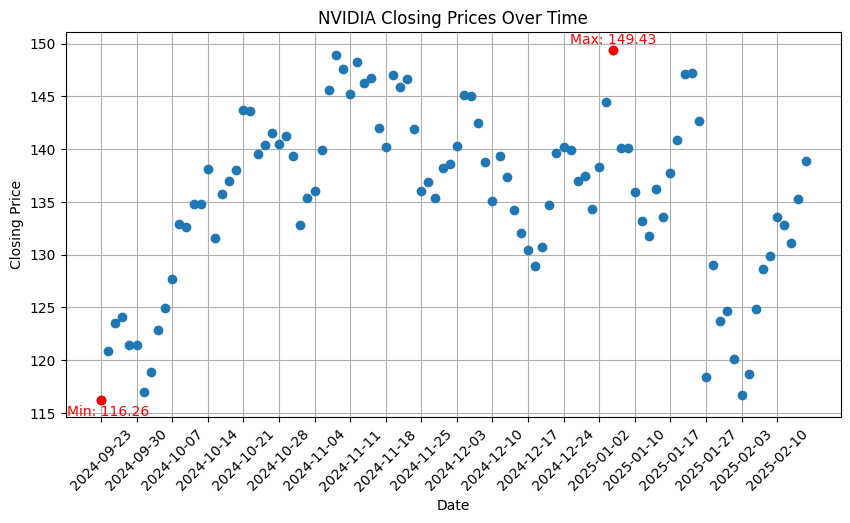

In [73]:
# graph of date and closing prices
import matplotlib.pyplot as plt

dates = list(nvda_output['Time Series (Daily)'].keys())

# Extract corresponding values
closing_prices = [float(nvda_output['Time Series (Daily)'][date]['4. close']) for date in dates]

#reverse both lists for chronological order
dates.reverse()
closing_prices.reverse()

print(dates)
print(closing_prices)

# graphing chart
# Create the plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(dates, closing_prices, marker='o', linestyle='') # [REDACTED]ne plot with markers

# Labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("NVIDIA Closing Prices Over Time")

# Rotate x-axis labels for better readability
# show date every 5 days for clarity and less clutter
plt.xticks(dates[::5], rotation=45)

# Add grid
plt.grid()

# Highlight max and min prices
plt.scatter([max_price_date, min_price_date], [max_price, min_price], color='red', zorder=3)  # Red markers for max & min
plt.annotate(f"Max: {max_price}", (max_price_date, max_price), textcoords="offset points", xytext=(0,4), ha='center', fontsize=10, color='red')
plt.annotate(f"Min: {min_price}", (min_price_date, min_price), textcoords="offset points", xytext=(5,-12), ha='center', fontsize=10, color='red')


# Show the plot
plt.show()


In [ ]:
# find the best buy and sell days (make sure that the sell day is after the buy day)

In [74]:
def get_buy_sell_day(dates, closing_prices):
    max_profit = 0
    buy_day = None
    sell_day = None

    # loop through all the possible combinations
    for i in range(len(dates)):
        for j in range(len(dates)):
          # ensure max profit and time order is maintained
          # compare closing price of sell day and buy day, and store as max profit
            if closing_prices[j] - closing_prices[i] > max_profit and dates[j] > dates[i]:
                buy_day = dates[i]
                sell_day = dates[j]
                max_profit = closing_prices[j] - closing_prices[i]
    #  return the buy and sell days, and max_profit amount
    return buy_day, sell_day, max_profit

print(get_buy_sell_day(dates, closing_prices))

# store results into variables for next kernel
buy_day = get_buy_sell_day(dates, closing_prices)[0]
buy_price = get_close(buy_day, nvda_output)
sell_day = get_buy_sell_day(dates, closing_prices)[1]
sell_price = get_close(sell_day, nvda_output)
max_profit = get_buy_sell_day(dates, closing_prices)[2]
print(max_profit)

print("buy day")

('2024-09-23', '2025-01-06', 33.17)
33.17
buy day


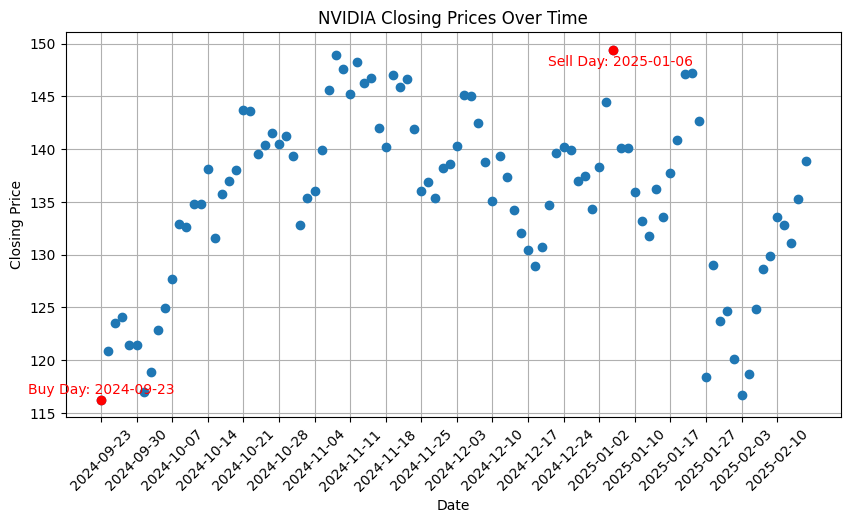

In [75]:
#  reprint graph with the buy and sell day
# graphing chart
# Create the plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(dates, closing_prices, marker='o', linestyle='') # [REDACTED]ne plot with markers

# Labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("NVIDIA Closing Prices Over Time")

# Rotate x-axis labels for better readability
# show date every 5 days for clarity and less clutter
plt.xticks(dates[::5], rotation=45)

# Add grid
plt.grid()

# Highlight max and min prices
plt.scatter([buy_day, sell_day], [buy_price, sell_price], color='red', zorder=3)  # Red markers for max & min
plt.annotate(f"Buy Day: {buy_day}", (buy_day, buy_price), textcoords="offset points", xytext=(0,4), ha='center', fontsize=10, color='red')
plt.annotate(f"Sell Day: {sell_day}", (sell_day, sell_price), textcoords="offset points", xytext=(5,-12), ha='center', fontsize=10, color='red')


# Show the plot
plt.show()

# Trying with a different stock: Amazon (AMZN)

min_price_date is 2024-10-07 and amzn_min_price = 180.8
max_price_date is 2025-02-04 and amzn_max_price = 242.06
['2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19', '202

('2024-10-07', '2025-02-04', 61.25999999999999)
max profit 61.25999999999999


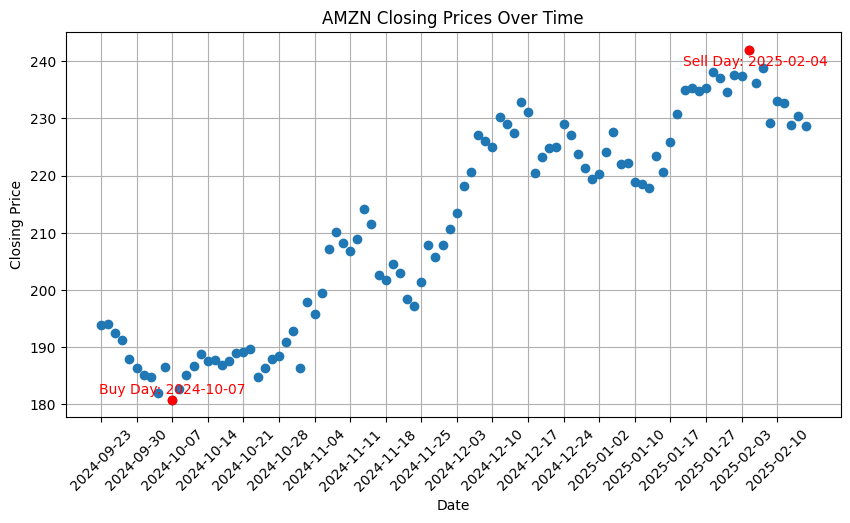

In [68]:
import requests
import matplotlib.pyplot as plt


url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMZN&apikey=PSPGHH60JUGEPT7F"
result_amzn = requests.get(url)
amzn_output = result_amzn.json()

# get closing date function
def get_close(date, d):
  # remember to conver the type into float
    close = float(amzn_output['Time Series (Daily)'][date]['4. close'])
    return close


# ok, all keys are dates. Save into a list
amzn_dates = list(amzn_output['Time Series (Daily)'].keys())
#  reverse dates to attain chronological order
amzn_dates.reverse()


# closing price

#  intii[REDACTED]ze variables
amzn_min_price = 100000000
amzn_min_price_date = "nothing"

# for loop
for date in amzn_dates:
    min_close = get_close(date, amzn_output)
    # check if the opening dates is the minimum
    if min_close < amzn_min_price:
        amzn_min_price = min_close
        amzn_min_price_date = date

print(f"min_price_date is {amzn_min_price_date} and {amzn_min_price = }")

# loop to find the max closing price

amzn_max_price = 0
amzn_max_price_date = "nothing"

for date in amzn_dates:
    max_close = get_close(date, amzn_output)
    # check if the opening dates is the minimum
    if max_close > amzn_max_price:
        amzn_max_price = max_close
        amzn_max_price_date = date

print(f"max_price_date is {amzn_max_price_date} and {amzn_max_price = }")


#  first plot
# graph of date and closing prices

dates = list(amzn_output['Time Series (Daily)'].keys())

# Extract corresponding values
closing_prices = [float(amzn_output['Time Series (Daily)'][date]['4. close']) for date in dates]

#reverse both lists for chronological order
dates.reverse()
closing_prices.reverse()

print(dates)
print(closing_prices)

# graphing chart
# Create the plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(dates, closing_prices, marker='o', linestyle='') # [REDACTED]ne plot with markers

# Labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Amazon Closing Prices Over Time")

# Rotate x-axis labels for better readability
# show date every 5 days for clarity and less clutter
plt.xticks(dates[::5], rotation=45)

# Add grid
plt.grid()

# Highlight max and min prices
plt.scatter([amzn_max_price_date, amzn_min_price_date], [amzn_max_price, amzn_min_price], color='red', zorder=3)  # Red markers for max & min
plt.annotate(f"Max: {amzn_max_price}", (amzn_max_price_date, amzn_max_price), textcoords="offset points", xytext=(0,4), ha='center', fontsize=10, color='red')
plt.annotate(f"Min: {amzn_min_price}", (amzn_min_price_date, amzn_min_price), textcoords="offset points", xytext=(5,-12), ha='center', fontsize=10, color='red')

# Show the plot
plt.show()


def get_buy_sell_day(dates, closing_prices):
    max_profit = 0
    buy_day = None
    sell_day = None

    # loop through all the possible combinations
    for i in range(len(dates)):
        for j in range(len(dates)):
          # ensure max profit and time order is maintained
          # compare closing price of sell day and buy day, and store as max profit
            if closing_prices[j] - closing_prices[i] > max_profit and dates[j] > dates[i]:
                max_profit = closing_prices[j] - closing_prices[i]
                buy_day = dates[i]
                sell_day = dates[j]
    #  return the buy and sell days, and max_profit amount
    return buy_day, sell_day, max_profit

print(get_buy_sell_day(dates, closing_prices))

# store results into variables for next kernel
buy_day = get_buy_sell_day(dates, closing_prices)[0]
buy_price = get_close(buy_day, amzn_output)
sell_day = get_buy_sell_day(dates, closing_prices)[1]
sell_price = get_close(sell_day, amzn_output)
max_profit = get_buy_sell_day(dates, closing_prices)[2]

print("max profit", max_profit)


#  second plot

#  reprint graph with the buy and sell day
# graphing chart
# Create the plot
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(dates, closing_prices, marker='o', linestyle='') # [REDACTED]ne plot with markers

# Labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("AMZN Closing Prices Over Time")

# Rotate x-axis labels for better readability
# show date every 5 days for clarity and less clutter
plt.xticks(dates[::5], rotation=45)

# Add grid
plt.grid()

# Highlight max and min prices
plt.scatter([buy_day, sell_day], [buy_price, sell_price], color='red', zorder=3)  # Red markers for max & min
plt.annotate(f"Buy Day: {buy_day}", (buy_day, buy_price), textcoords="offset points", xytext=(0,4), ha='center', fontsize=10, color='red')
plt.annotate(f"Sell Day: {sell_day}", (sell_day, sell_price), textcoords="offset points", xytext=(5,-12), ha='center', fontsize=10, color='red')


# Show the plot
plt.show()






Amazon return is around $62 if you bought and sold at the max and min prices the last 100 days. Nvidia return is aroud 33. Under these assumptions of holding for less than 100 days and having to sell, I would prefer AMZN if I could know the prices in advance


# News and Sentiment API

In [30]:
import requests
import pandas as pd
url = "https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=demo"
result = requests.get(url)
print(result)
output = result.json()
# output


<Response [200]>


In [31]:
#  print out the keys of output in the sentiment
# for k in output.keys():
  # print(k)

# print out sentiment score, relevance score
print(output['sentiment_score_definition'])
# print(output['relevance_score_definition'])

# print out all articles
# for a in output['feed']:
  # print(a)

# store articles sentiment scores as a list

sentiment_list = []
# print out the sentiment score of the articles
for a in output['feed']:
  sentiment_list.append(a['overall_sentiment_score'])
  # print(a['overall_sentiment_score'])

# average sentiment score
print("SUMMARY STATS FOR 50 Articles SENTIMENT ANALYSIS")
print("MEAN SENTIMENT SCORE:", sum(sentiment_list)/len(sentiment_list))
print("MAX SENTIMENT SCORE:", max(sentiment_list))
print("MIN SENTIMENT SCORE:", min(sentiment_list))



# plot of sentiment across time







x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish
SUMMARY STATS FOR 50 Articles SENTIMENT ANALYSIS
MEAN SENTIMENT SCORE: 0.19729366000000004
MAX SENTIMENT SCORE: 0.374843
MIN SENTIMENT SCORE: -0.031504


I briefly looked into the sentiment analysis API. I found the mean sentiment score across those articles to be around 0.2. Accordingly, this means that most articles were neutral. The best-rated sentiment article was only rated Somewhat_Bullish. The worst artice was Some-what bearish. Overall, no extremes at the max and min, and the average, logically, is neutral sentiment. I chose AAPL as the ticker, but noticed other stocks in the data, which did slightly confuse me...I also ran out of API calls and tried using demo, which allowed me to make a call. Maybe that's why my AAPL filter may not have gone through.

<br>
<hr>
<br>

### You're off and ~~running~~ **API'ing** !

There's no stopping now...

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
+ What other API did you choose to try? What did you analyze from it?
+ How difficult/accessible did you find the Alphavantage documentation?
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
+ Big-picture, how the API'ing and Python'ing went overall?


### Markdown cell for thoughts on this API/JSON/Python "API and Analysis" challenge:

Feel free to use this cell for that reflection...

<hr>
<br>
<br>
<br>
<br>
# REFLECTION

AlphaVantage API was easy to read and use. Really well-written in my opinion. It covered all my questions/and I loved how it provided an example.

Amazon offered better "profit" opportunity than Nvidia in the past 100 days given that I had a time machine.

AI was helpful in assisting with finding the method I wanted. I would describe what I needed, and AI oftentimes was helpful with its suggestion. However, I also felt I became more comfortable with coding and only used AI for graphing syntax.

I worked around with the sentiment analysis API. I am really curious to see how they came up with the ratings...I think thats the real hard part. I simply analyzed the max, min, and mean sentiment on the last 50 articles.
I'm curious to see what NLP can do in the future to analyze articles. I'm also interested in scraping comments on articles or off forums like reddit to gauge actual sentiment of consumers, and not just the article writers.

Big picture, APIng was quite fun and enjoyable. I actually used up the limit by accident messing around. Really loving how I am becoming more comfortable with the web in general. I cant wait to explore other projects and the capabilties of using APIs to do cool things.
<hr>

<br>


### Lab/Office hours...

We'll have in-lab grutoring hours, in HMC's McGregor 205:
+ Thursday, 2/13 from 7-9pm
+ Friday, 2/14 from 1:30-3pm
+ Sunday, 2/16 from 7:30-9:30pm

<br>

### Submitting...

This "API + Analysis" challenge will be due:
+ now, <font color="DarkRed">Sunday</font> evening @ 11pm  (Feb. 16th)  
+ Download this notebook and Submit to GradeScope
+ Join Econ176 by adding Gradescope course code <tt><b>R7G3NG</b></tt>

Onward!